# Deep Learning: Regression using Keras for House Price Prediction 

Dataset: 
https://www.kaggle.com/harlfoxem/housesalesprediction

The features of this dataset are: 

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../DATA/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
# Check if null data exists
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Data Visualiztion

/home/bogeymantan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

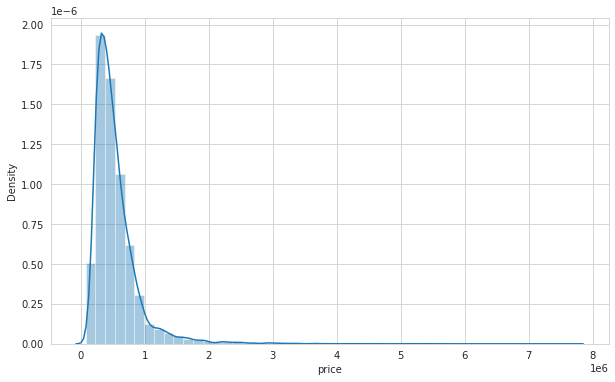

In [9]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df["price"])

/home/bogeymantan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

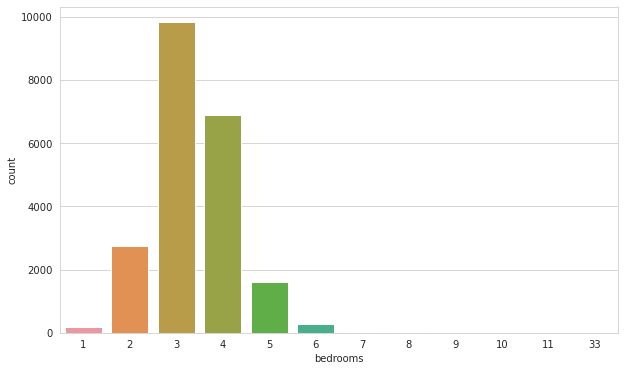

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df["bedrooms"])

In [19]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [20]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

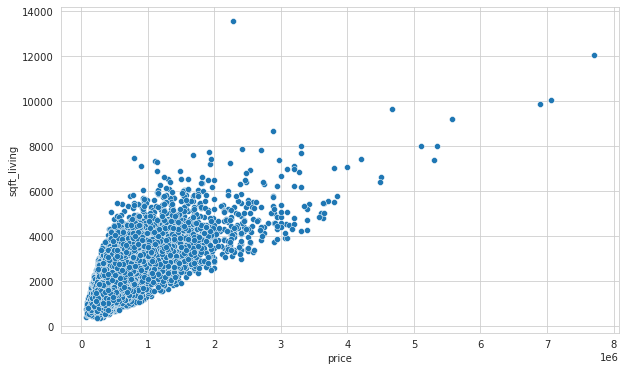

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="price",y="sqft_living")

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

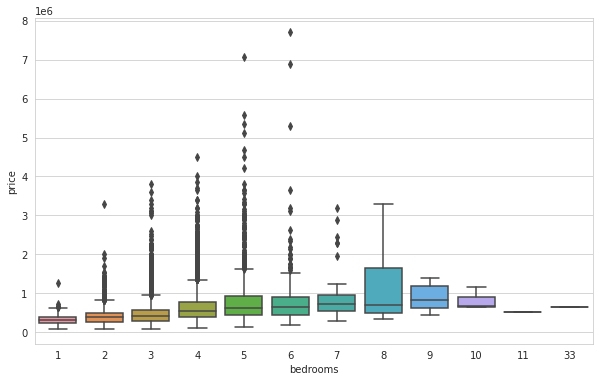

In [23]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df,x="bedrooms",y="price")

<AxesSubplot:xlabel='price', ylabel='long'>

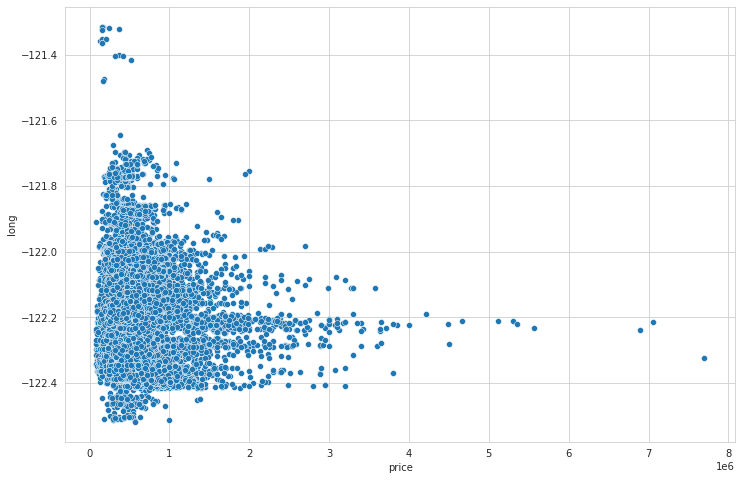

In [25]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df,x="price",y="long")

<AxesSubplot:xlabel='price', ylabel='lat'>

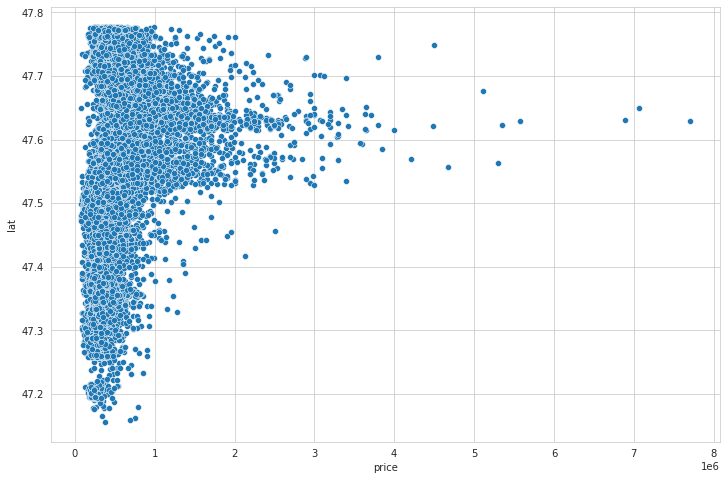

In [26]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df,x="price",y="lat")

<AxesSubplot:xlabel='long', ylabel='lat'>

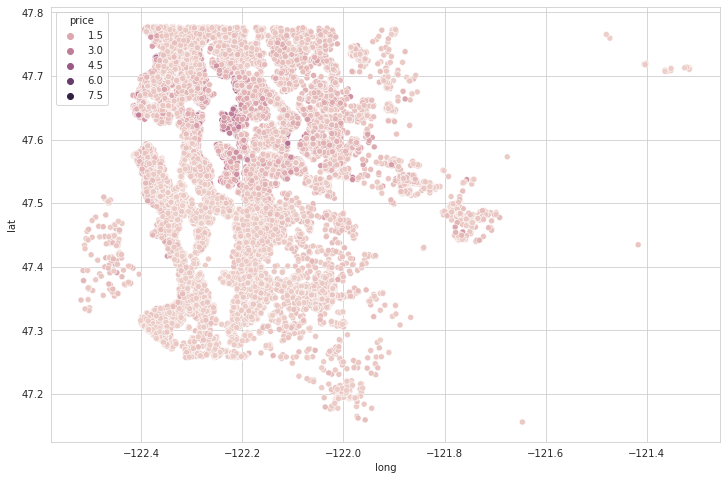

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='long',y='lat',hue="price")

## King County's Map
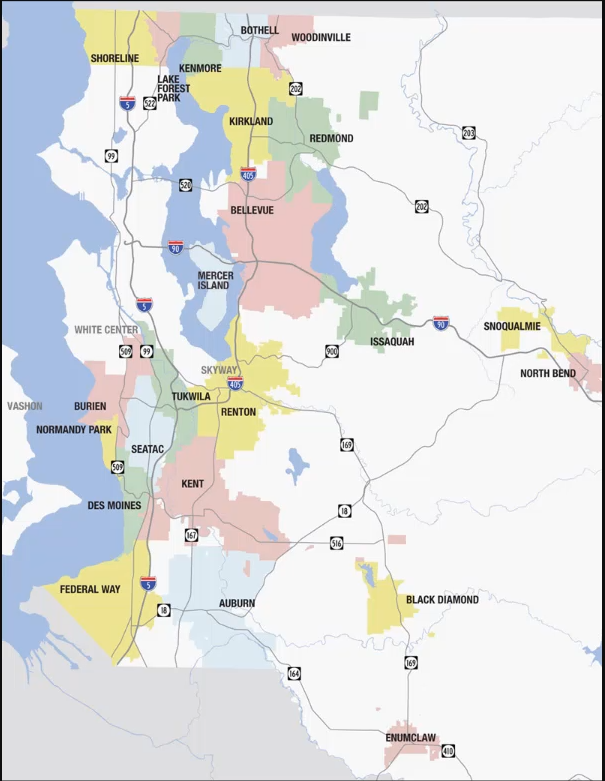

In [29]:
df.sort_values("price",ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [30]:
len(df)

21597

In [31]:
len(df) * 0.01

215.97

In [32]:
non_top_1_perc = df.sort_values("price",ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

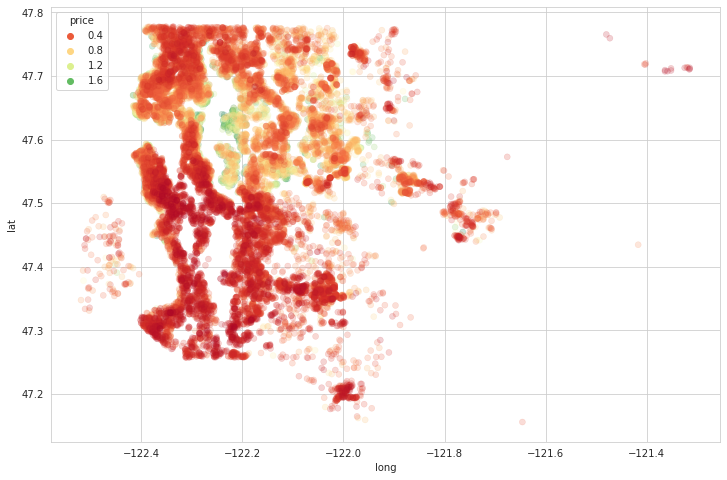

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=non_top_1_perc,x='long',y='lat',edgecolor=None,alpha=0.2,palette="RdYlGn",hue="price")

<AxesSubplot:xlabel='waterfront', ylabel='price'>

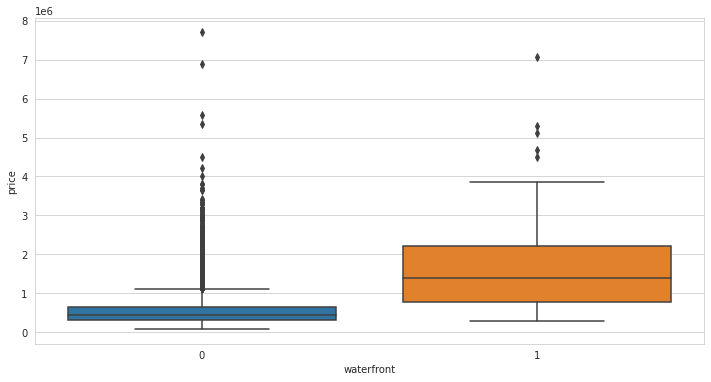

In [36]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df,x="waterfront",y="price")

## Feature Engineering

In [10]:
df = df.drop("id",axis=1)

In [11]:
df["date"] = pd.to_datetime(df["date"])

In [12]:
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)

In [13]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

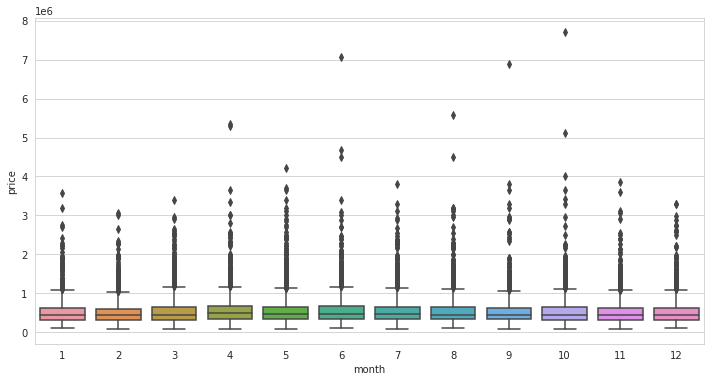

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="month",y="price")

In [49]:
df.groupby("month").mean()["price"].sort_values()

month
2     508520.051323
11    522359.903478
12    524799.902041
1     525963.251534
9     529723.517787
8     536655.212481
10    539439.447228
3     544057.683200
7     544892.161013
5     550849.746893
6     557534.318182
4     562215.615074
Name: price, dtype: float64

In [50]:
df.groupby("year").mean()["price"].sort_values()

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

In [14]:
df = df.drop("date",axis=1)

In [53]:
df["zipcode"].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [15]:
df = df.drop("zipcode",axis=1)

In [55]:
df["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [57]:
df["sqft_basement"].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [16]:
X = df.drop("price",axis=1)
y = df["price"]

## Model Training

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-03-14 10:32:43.191415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
X_train.shape

(14469, 19)

In [25]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

2023-03-14 10:32:55.414298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), batch_size=128, epochs=500)

Epoch 1/500
114/114 [==============================] - 2s 5ms/step - loss: 430863384576.0000 - val_loss: 418667692032.0000
Epoch 2/500
114/114 [==============================] - 0s 3ms/step - loss: 429880573952.0000 - val_loss: 415363923968.0000
Epoch 3/500
114/114 [==============================] - 0s 3ms/step - loss: 417241268224.0000 - val_loss: 387030843392.0000
Epoch 4/500
114/114 [==============================] - 0s 3ms/step - loss: 356776476672.0000 - val_loss: 288183418880.0000
Epoch 5/500
114/114 [==============================] - 0s 3ms/step - loss: 223016452096.0000 - val_loss: 144580640768.0000
Epoch 6/500
114/114 [==============================] - 0s 3ms/step - loss: 116987158528.0000 - val_loss: 98118303744.0000
Epoch 7/500
114/114 [==============================] - 0s 3ms/step - loss: 100313686016.0000 - val_loss: 96103890944.0000
Epoch 8/500
114/114 [==============================] - 0s 3ms/step - loss: 98570575872.0000 - val_loss: 94709293056.0000
Epoch 9/500
114/114 

114/114 [==============================] - 0s 3ms/step - loss: 38930595840.0000 - val_loss: 39657779200.0000
Epoch 69/500
114/114 [==============================] - 0s 3ms/step - loss: 38734340096.0000 - val_loss: 39372886016.0000
Epoch 70/500
114/114 [==============================] - 0s 3ms/step - loss: 38509191168.0000 - val_loss: 39150370816.0000
Epoch 71/500
114/114 [==============================] - 0s 3ms/step - loss: 38274838528.0000 - val_loss: 38942023680.0000
Epoch 72/500
114/114 [==============================] - 0s 3ms/step - loss: 38078472192.0000 - val_loss: 38730563584.0000
Epoch 73/500
114/114 [==============================] - 0s 3ms/step - loss: 37868249088.0000 - val_loss: 38504837120.0000
Epoch 74/500
114/114 [==============================] - 0s 3ms/step - loss: 37630169088.0000 - val_loss: 38321102848.0000
Epoch 75/500
114/114 [==============================] - 0s 3ms/step - loss: 37447520256.0000 - val_loss: 38129291264.0000
Epoch 76/500
114/114 [===============

Epoch 135/500
114/114 [==============================] - 0s 3ms/step - loss: 32313604096.0000 - val_loss: 33288060928.0000
Epoch 136/500
114/114 [==============================] - 0s 3ms/step - loss: 32362094592.0000 - val_loss: 33257816064.0000
Epoch 137/500
114/114 [==============================] - 0s 3ms/step - loss: 32266829824.0000 - val_loss: 33211367424.0000
Epoch 138/500
114/114 [==============================] - 0s 3ms/step - loss: 32256645120.0000 - val_loss: 33249191936.0000
Epoch 139/500
114/114 [==============================] - 0s 3ms/step - loss: 32153479168.0000 - val_loss: 33180858368.0000
Epoch 140/500
114/114 [==============================] - 0s 3ms/step - loss: 32125665280.0000 - val_loss: 33147904000.0000
Epoch 141/500
114/114 [==============================] - 0s 3ms/step - loss: 32110649344.0000 - val_loss: 33183782912.0000
Epoch 142/500
114/114 [==============================] - 0s 3ms/step - loss: 32115599360.0000 - val_loss: 33067646976.0000
Epoch 143/500
11

114/114 [==============================] - 0s 3ms/step - loss: 30687920128.0000 - val_loss: 31796381696.0000
Epoch 202/500
114/114 [==============================] - 0s 3ms/step - loss: 30638125056.0000 - val_loss: 31765766144.0000
Epoch 203/500
114/114 [==============================] - 0s 3ms/step - loss: 30653921280.0000 - val_loss: 31818276864.0000
Epoch 204/500
114/114 [==============================] - 0s 3ms/step - loss: 30650120192.0000 - val_loss: 31732627456.0000
Epoch 205/500
114/114 [==============================] - 0s 3ms/step - loss: 30600732672.0000 - val_loss: 31742855168.0000
Epoch 206/500
114/114 [==============================] - 0s 3ms/step - loss: 30569912320.0000 - val_loss: 31725846528.0000
Epoch 207/500
114/114 [==============================] - 0s 3ms/step - loss: 30604414976.0000 - val_loss: 31708966912.0000
Epoch 208/500
114/114 [==============================] - 0s 3ms/step - loss: 30599659520.0000 - val_loss: 31685576704.0000
Epoch 209/500
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 29731219456.0000 - val_loss: 31085875200.0000
Epoch 268/500
114/114 [==============================] - 0s 3ms/step - loss: 29727358976.0000 - val_loss: 31199531008.0000
Epoch 269/500
114/114 [==============================] - 0s 3ms/step - loss: 29708587008.0000 - val_loss: 31106453504.0000
Epoch 270/500
114/114 [==============================] - 0s 3ms/step - loss: 29721790464.0000 - val_loss: 31034279936.0000
Epoch 271/500
114/114 [==============================] - 0s 3ms/step - loss: 29685559296.0000 - val_loss: 31076306944.0000
Epoch 272/500
114/114 [==============================] - 0s 3ms/step - loss: 29672929280.0000 - val_loss: 31093886976.0000
Epoch 273/500
114/114 [==============================] - 0s 3ms/step - loss: 29639462912.0000 - val_loss: 31021815808.0000
Epoch 274/500
114/114 [==============================] - 0s 3ms/step - loss: 29652969472.0000 - val_loss: 31154776064.0000
Epoch 275/500
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 29035730944.0000 - val_loss: 30601738240.0000
Epoch 334/500
114/114 [==============================] - 0s 3ms/step - loss: 29060864000.0000 - val_loss: 30561222656.0000
Epoch 335/500
114/114 [==============================] - 0s 3ms/step - loss: 29015943168.0000 - val_loss: 30495934464.0000
Epoch 336/500
114/114 [==============================] - 0s 3ms/step - loss: 29010544640.0000 - val_loss: 30535452672.0000
Epoch 337/500
114/114 [==============================] - 0s 3ms/step - loss: 29038753792.0000 - val_loss: 30573041664.0000
Epoch 338/500
114/114 [==============================] - 0s 3ms/step - loss: 29029292032.0000 - val_loss: 30455965696.0000
Epoch 339/500
114/114 [==============================] - 0s 3ms/step - loss: 29058910208.0000 - val_loss: 30464108544.0000
Epoch 340/500
114/114 [==============================] - 0s 3ms/step - loss: 28974761984.0000 - val_loss: 30475403264.0000
Epoch 341/500
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 28433162240.0000 - val_loss: 29997631488.0000
Epoch 400/500
114/114 [==============================] - 0s 3ms/step - loss: 28442071040.0000 - val_loss: 30003040256.0000
Epoch 401/500
114/114 [==============================] - 0s 3ms/step - loss: 28424759296.0000 - val_loss: 29934948352.0000
Epoch 402/500
114/114 [==============================] - 0s 3ms/step - loss: 28405086208.0000 - val_loss: 29978337280.0000
Epoch 403/500
114/114 [==============================] - 0s 3ms/step - loss: 28560738304.0000 - val_loss: 30049273856.0000
Epoch 404/500
114/114 [==============================] - 0s 3ms/step - loss: 28419477504.0000 - val_loss: 30061338624.0000
Epoch 405/500
114/114 [==============================] - 0s 3ms/step - loss: 28424689664.0000 - val_loss: 29926815744.0000
Epoch 406/500
114/114 [==============================] - 0s 3ms/step - loss: 28386158592.0000 - val_loss: 29928159232.0000
Epoch 407/500
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 27862024192.0000 - val_loss: 29338859520.0000
Epoch 466/500
114/114 [==============================] - 0s 3ms/step - loss: 27881807872.0000 - val_loss: 29322264576.0000
Epoch 467/500
114/114 [==============================] - 0s 3ms/step - loss: 27801268224.0000 - val_loss: 29310074880.0000
Epoch 468/500
114/114 [==============================] - 0s 3ms/step - loss: 27779422208.0000 - val_loss: 29319661568.0000
Epoch 469/500
114/114 [==============================] - 0s 3ms/step - loss: 27766644736.0000 - val_loss: 29343805440.0000
Epoch 470/500
114/114 [==============================] - 0s 3ms/step - loss: 27766444032.0000 - val_loss: 29285832704.0000
Epoch 471/500
114/114 [==============================] - 0s 3ms/step - loss: 27741415424.0000 - val_loss: 29286684672.0000
Epoch 472/500
114/114 [==============================] - 0s 3ms/step - loss: 27748405248.0000 - val_loss: 29242445824.0000
Epoch 473/500
114/114 [=======

## Testing and Model Evaluation

In [27]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

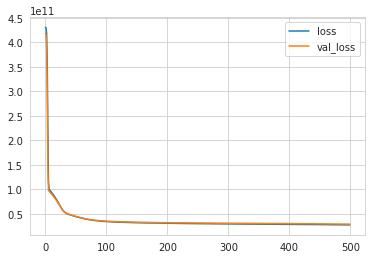

In [29]:
plt.figure(figsize=(12,6))
losses.plot()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [31]:
predictions = model.predict(X_test)

223/223 [==============================] - 0s 1ms/step


In [32]:
mean_squared_error(y_test,predictions) ** 0.5

169997.85419912406

In [33]:
mean_absolute_error(y_test,predictions)

104168.59994585613

To find out how good our model is, how good our numbers are, we need to compare it to the mean of the data. 

In [34]:
df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [38]:
5.402966e+05

540296.6

Our error is about 20% of the mean, which is not bad, but not ideal

In [35]:
explained_variance_score(y_test,predictions)

0.7790184605576322

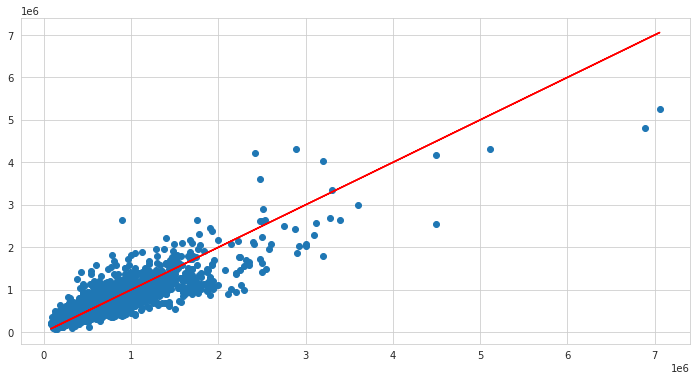

In [37]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

Here we can see, our model is decent in the 0-2 million dollar range, but pretty bad outside

In [45]:
single_house = df.drop("price",axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [47]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

/home/bogeymantan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [48]:
single_house_prediction = model.predict(single_house)

1/1 [==============================] - 0s 34ms/step


In [49]:
single_house_prediction

array([[283351.56]], dtype=float32)

In [50]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


Our model's prediction, 283351, was pretty close to the actual value, 221900